### **HOMEWORK 4**  <h3>

Inicialmente, é necessário ler o ficheiro de dados e separar os dados em dois grupos: um para as features (variáveis de input) e outro para as classes (variáveis de output). Tal como indicado, foi também feita a normalização das variáveis

In [6]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics, cluster
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt


# Ler o ficheiro
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1) #variables
y = df['class'] #target


# normailização dos dados
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)

### **Exercício 1**  <h3>

Aplicámos o clustering k-means e treinámos o modelo, com valores de k entre 2 e 5. Para cada valor de k, calculámos a silhouette e a purity.

In [7]:
# Função para obter a purity
def purity_score(y_true, y_pred):
    # obter confusion matrix
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 


k_values = [2, 3, 4, 5]
silhouette_list = []
purity_list = []

for k in k_values:
    # inicializar k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # aprender o modelo com X normalizado
    kmeans.fit(normalized_data)
    
    # obter o y previsto
    labels = kmeans.labels_
    
    # Calculate the silhouette score
    silhouette = silhouette_score(normalized_data, labels)
    silhouette_list.append(silhouette)

    purity = purity_score(y, labels)
    purity_list.append(purity)

    # guardar para o exercício 3
    if k==3: labels_3 = labels

for i in range(len(k_values)):
    print(f'k={k_values[i]}: silhouette={silhouette_list[i]}, purity={purity_list[i]}')


/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


k=2: silhouette=0.36044124340441114, purity=0.632258064516129
k=3: silhouette=0.29579055730002257, purity=0.667741935483871
k=4: silhouette=0.27442402122340176, purity=0.6612903225806451
k=5: silhouette=0.23823928397844843, purity=0.6774193548387096


/home/sofiatete/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Fizémos o plot dos gráficos da silhouette e da purity em função do valor de k.

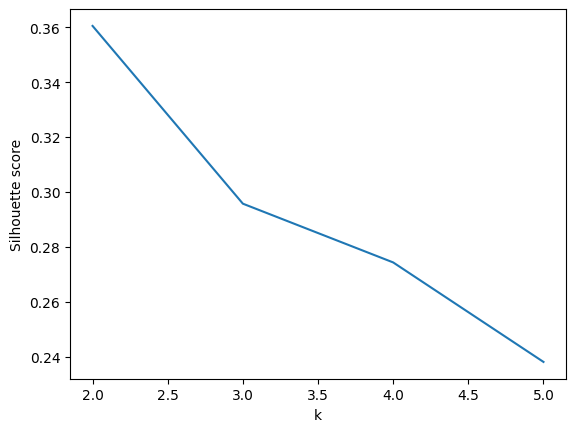

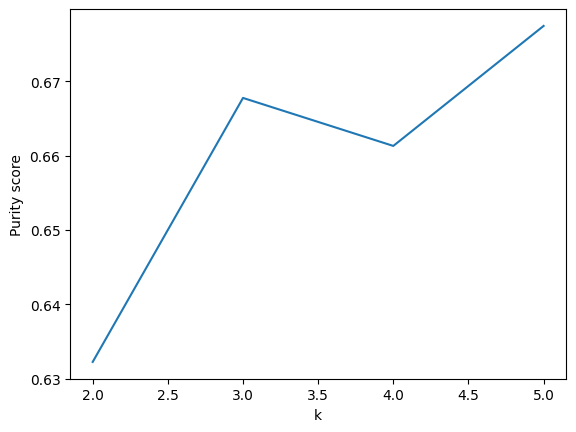

In [8]:
#gráfico silhoutte vs k
plt.plot(k_values, silhouette_list)
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

#gráfico purity vs k
plt.plot(k_values, purity_list)
plt.xlabel('k')
plt.ylabel('Purity score')
plt.show()

Quanto mais próximo de 1, melhor é a purity, a qual indica se os clusters foram bem atribuídos. Verficamos que quanto maior é o número de clusters, melhor é a purity. No caso da silhouette, um valor mais próximo de 1 indica que a variável está longe dos clusters vizinhos, enquanto que um valor próximo de 0 indica que a variável está perto dos clusters vizinhos. Verificamos que a silhouette é maior para k=2, o que indica que os clusters estão mais bem definidos.


### **Exercício 2**  <h3>

Aplicámos PCA e obtivemos os valores da variabilidade para os dois principais componentes. Para cada um destes componentes ordenámos as variáveis de input por ordem de importância.

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data)

explained_variance = pca.explained_variance_ratio_
print(f'Variability explained by the first principal component: {explained_variance[0]}')
print(f'Variability explained by the second principal component: {explained_variance[1]}')

xvector = pca.components_[0] * max(principal_components[:, 0])
yvector = pca.components_[1] * max(principal_components[:, 1])

columns = X.columns

# sort das variáveis por ordem de relevância, usando o valor absoluto dos pesos
sorted_features_1 = sorted(zip(columns, xvector), key=lambda x: abs(x[1]), reverse=True)
print("Features sorted by relevance for the first principal component:")
for feature, weight in sorted_features_1:
    print(f'{feature}: {abs(weight)}')


sorted_features_2 = sorted(zip(columns, yvector), key=lambda x: abs(x[1]), reverse=True)
print("\nFeatures sorted by relevance for the second principal component:")
for feature, weight in sorted_features_2:
    print(f'{feature}: {abs(weight)}')

Variability explained by the first principal component: 0.5618144484299212
Variability explained by the second principal component: 0.20955952591361887
Features sorted by relevance for the first principal component:
pelvic_incidence: 0.4439381189674858
lumbar_lordosis_angle: 0.38650742304776947
pelvic_tilt: 0.3504553489223594
sacral_slope: 0.2443892195055289
degree_spondylolisthesis: 0.1627788670697808
pelvic_radius: 0.08691157240314012

Features sorted by relevance for the second principal component:
pelvic_tilt: 0.3779680226028099
pelvic_radius: 0.3276197101726396
sacral_slope: 0.24994207181864442
pelvic_incidence: 0.05640267275895373
lumbar_lordosis_angle: 0.04513216890599713
degree_spondylolisthesis: 0.002583925578625818


### **Exercício 3**  <h3>

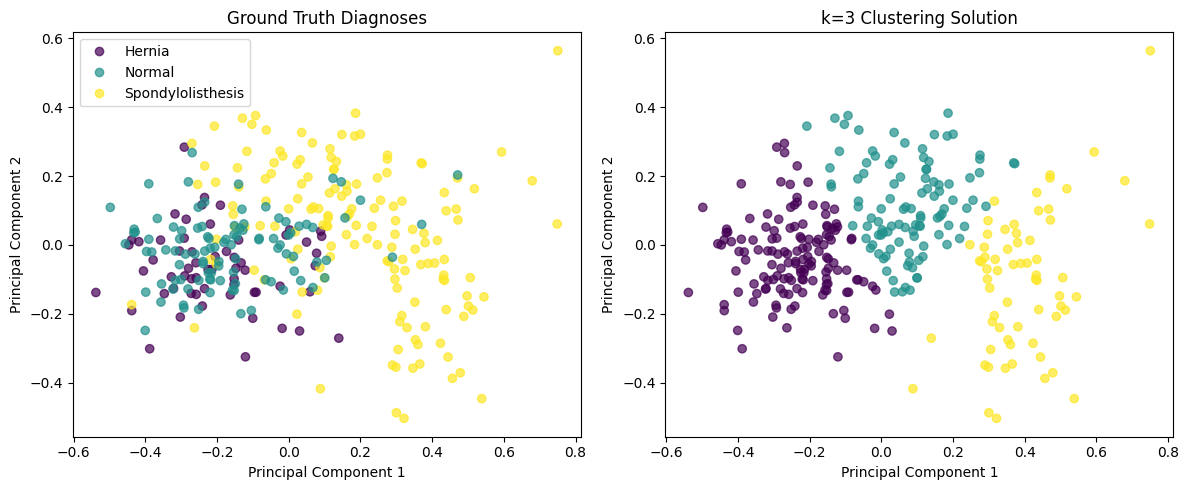

In [10]:
le = LabelEncoder()
encoded_classes = le.fit_transform(df['class'])

class_names = le.classes_
labels_list = class_names.tolist()

# fazer os plots
plt.figure(figsize=(12, 5))

# para o ground truth
plt.subplot(1, 2, 1)
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=encoded_classes, cmap='viridis', alpha=0.7)
plt.title("Ground Truth Diagnoses")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=scatter.legend_elements()[0], labels=labels_list)

# para o k-means clustering com k=3
plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels_3, cmap='viridis', alpha=0.7)
plt.title("k=3 Clustering Solution")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")


plt.tight_layout()
plt.show()

### **Exercício 4**  <h3>

O clustering pode ser útil para a identificação de subgrupos dentro da população de indivíduos doentes e saudáveis. Neste caso, podemos mais facilmente identificar padrões entre as condições Hernia, Spondylolisthesis e Normal, baseando-nos na similaridade dos seus atributos (pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, and degree_spondylolisthesis). Deste modo, clustering é útil para perceber as características de cada doença, permitindo que haja um melhor diagnóstico destas. Para além disso, analisando os clusters correspondentes aos indivíduos doentes (Hernia e Spondylolisthesis), podemos descobrir fatores de risco associdados a estas. No entanto, tal como verificado na resolução dos exercícios anteriores, nem sempre um cluster corresponde a uma classe, podendo haver dois grupos que correspondem à mesma categoria ou clusters com duas classes em simultâneo.Deste modo, é preciso ter cuidado na interpretação dos resultados. Para verificar a qualidade do clustering, podemos usar a purity e a silhouette, como fizémos nos exercícios anteriores.